<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Predictions: Regression for Car Mileage and Diamond Price


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use a car data set to train a regression model that will predict the mileage of a car.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-Train-a-Linear-Regression-Model">Task 3 - Build and Train a Linear Regression Model</a></li>
    <li><a href="#Task-4---Evaluate-the-model-and-make-predictions">Task 4 - Evaluate the model and make predictions</a></li>        </ol>
    </li>
    


<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-Linear-Regression-Model">Exercise 3 - Build and Train a new Linear Regression Model</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Predict-the-price-of-a-diamond">Exercise 5 - Predict the price of a diamond</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Linear Regression to build a model to predict car mileage.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active
 


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas==1.3.4
!pip install scikit-learn==1.0.2
!pip install numpy==1.21.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 71.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 55.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [5]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Task 1 - Load the data in a csv file into a dataframe


In [7]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [8]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
358,32.4,4,108.0,75,2350,16.8,81,Japanese
289,18.2,8,318.0,135,3830,15.2,79,American
191,26.0,4,98.0,79,2255,17.7,76,American
43,14.0,8,318.0,150,4096,13.0,71,American
309,28.0,4,151.0,90,2678,16.5,80,American


Let's find out the number of rows and columns in the dataset:


In [9]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

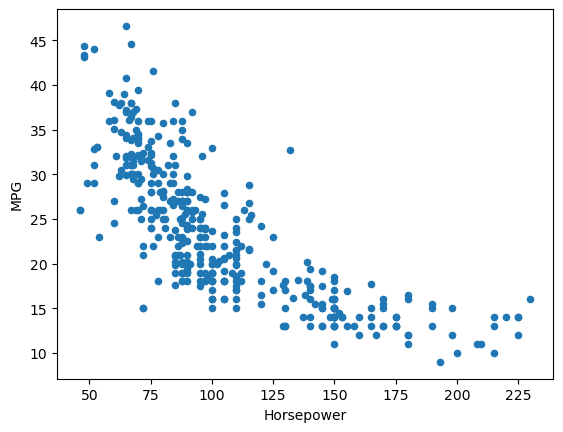

In [10]:
df.plot.scatter(x = "Horsepower", y = "MPG")

You are encouraged to create more plots to visualize relationships amongst other columns


<AxesSubplot:xlabel='Engine Disp', ylabel='MPG'>

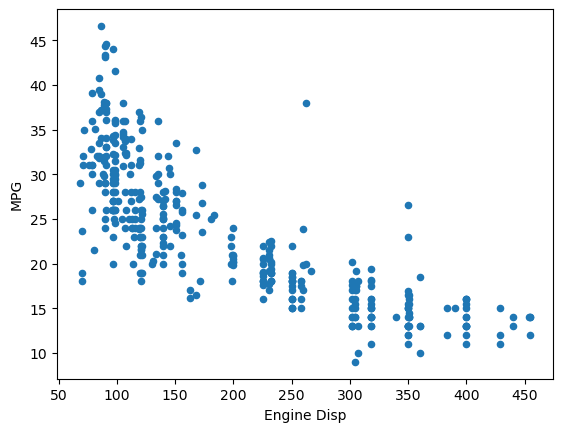

In [11]:
df.plot.scatter(x = "Engine Disp", y = "MPG")

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

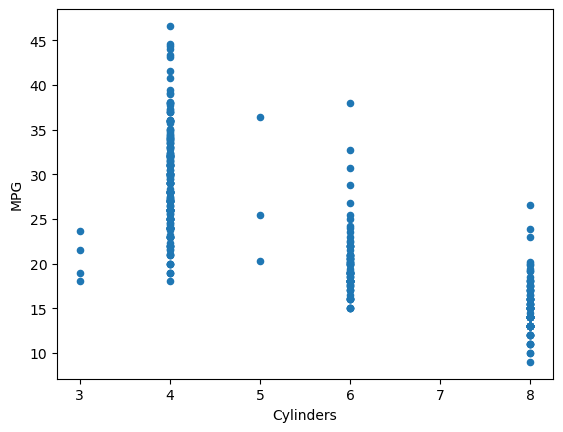

In [12]:
df.plot.scatter(x = "Cylinders", y = "MPG")

<AxesSubplot:xlabel='Horsepower', ylabel='MPG'>

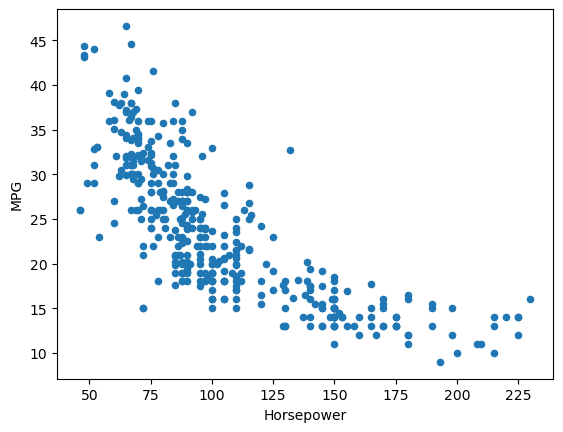

In [13]:
df.plot.scatter(x = "Horsepower", y = "MPG")

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

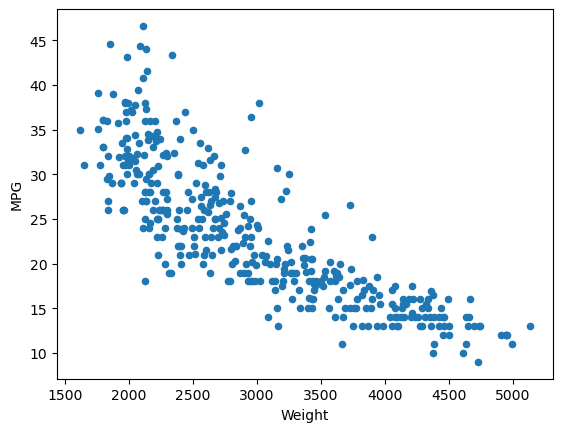

In [14]:
df.plot.scatter(x = "Weight", y = "MPG")

## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [15]:
target = df["MPG"]

We identify the features next. Features are the values our machine learning model learns from


In [16]:
features = df[["Horsepower","Weight"]]

## Task 3 - Build and Train a Linear Regression Model


Create a LR model


In [17]:
lr = LinearRegression()

Train/Fit the model


In [18]:
lr.fit(features,target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions


Your model is now trained. Time to evaluate the model.


In [19]:
#Higher the score, better the model.
lr.score(features,target)

0.7063752737298348

Make predictions. Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000


In [20]:
lr.predict([[100,2000]])

array([29.3216098])

In [23]:
# 29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

# Exercises


In [21]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [22]:
df2 = pd.read_csv(URL2)

<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Identify the target column and the data columns


 - use the price column as target
 - use the columns carat and depth as features


In [23]:
target = df2["price"]
features = df2[["carat","depth"]]

<details>
    <summary>Click here for a Hint</summary>
    
Refer to Task2
</details>


<details>
    <summary>Click here for Solution</summary>

```python
target = df2["price"]
features = df2[["carat","depth"]]
```

</details>


### Exercise 3 - Build and Train a new Linear Regression Model


Create a new Linear Regression Model


In [24]:
lr2 = LinearRegression()
lr2.fit(features,target)

LinearRegression()

<details>
    <summary>Click here for a Hint</summary>
    
fit using the features and target
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2 = LinearRegression()
lr2.fit(features,target)

```

</details>


### Exercise 4 - Evaluate the model


Print the score of the model


In [25]:
lr2.score(features,target)

0.8506754571636563

<details>
    <summary>Click here for a Hint</summary>
    
use the score() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2.score(features,target)

```

</details>


### Exercise 5 - Predict the price of a diamond


Predict the price of a diamond with carat = 0.3 and depth = 60


In [26]:
lr2.predict([[0.3, 60]])

array([244.95605225])

<details>
    <summary>Click here for a Hint</summary>
    
use the predict() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
lr2.predict([[0.3, 60]])

```

</details>


Congratulations! You have completed this lab.<br>
You are encouraged to experiment creating models with more than 2 feature columns


In [27]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
43640,43641,0.50,Good,F,VS2,63.6,58.0,1433,5.05,5.02,3.20
829,830,0.70,Ideal,D,VS2,62.4,57.0,2867,5.68,5.61,3.52
5288,5289,0.92,Very Good,H,SI1,60.6,60.0,3800,6.28,6.33,3.82
50751,50752,0.56,Ideal,F,VVS2,61.9,56.0,2298,5.28,5.32,3.28
43163,43164,0.42,Ideal,D,VVS2,61.4,56.0,1389,4.85,4.82,2.97


In [34]:
# When creating models with MORE THAN TWO (2) feature columns :
# ValueError: X has 5 features, but LinearRegression is expecting 2 features as input.

In [38]:
#2 Try creating a new model with different feature columns :
target = df2["price"]
features = df2[["carat","table"]]

In [39]:
#3 Build and train new Linear Regression model with different features
lr2 = LinearRegression()
lr2.fit(features,target)

LinearRegression()

In [40]:
#4 Evaluate the model and print the score:
lr2.score(features,target)

0.8510052873951578

In [41]:
#5 Predict the price of a diamond with carat = 0.7 and table 58.0
lr2.predict([[0.7, 58]])

array([3126.57554232])

In [43]:
target = df2["price"]

In [51]:
def f(x, y, z):
    return x*y*z

df2['volume'] = df2.apply(lambda vol: f(vol['x'], vol['y'], vol['z']), axis=1)

In [52]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z,volume
26491,26492,1.01,Very Good,D,IF,61.6,56.0,16087,6.43,6.46,3.97,164.905066
47751,47752,0.54,Very Good,D,VS2,60.6,58.0,1892,5.26,5.30,3.20,89.209600
15420,15421,1.01,Fair,D,VS2,65.6,61.0,6176,6.21,6.16,4.06,155.309616
24597,24598,1.52,Ideal,E,SI1,62.0,56.0,12907,7.36,7.34,4.56,246.342144
18575,18576,1.51,Premium,G,SI1,62.3,59.0,7577,7.29,7.21,4.52,237.575268


In [53]:
# Use the new column "volume" as a new feature
features = df2[["carat","volume"]]

In [54]:
#3 Build and train new Linear Regression model with different features
lr2 = LinearRegression()
lr2.fit(features,target)

LinearRegression()

In [55]:
#4 Evaluate the model and print the score:
lr2.score(features,target)

0.8494779422350422

In [57]:
#5 Predict the price of a diamond with carat = 1.0 and volume = 200
lr2.predict([[1, 200]])

array([5607.59625615])

In [58]:
#5 Predict the price of a diamond with carat = 1.5 and volume = 250
lr2.predict([[1.5, 250]])

array([9398.32348766])

In [59]:
#5 Predict the price of a diamond with carat = 1.0 and volume = 200
lr2.predict([[1, 200]])

array([5607.59625615])

## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|
|2024-07-16|1.0|Gay Calaranan-Dolapchieva|Laboratory performed|


Copyright © 2023 IBM Corporation. All rights reserved.
